In [1]:
%matplotlib inline
import cv2
import os
import re
import glob
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def loadImage(src):
    img = cv2.imread(src)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
def findCoins(img, scaling = 0.2, showCoins = False):
    scaling = 0.2
    img_gray = cv2.resize(img, None, fx=scaling, fy=scaling)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.blur(img_gray, (5,5))
    coins = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 30, param2 = 35, minRadius = 20, maxRadius = 50)
    coins = (np.round(coins[0, :]) / scaling).astype("int")
    if(showCoins):
        img_circles = img.copy()
        for x,y,r in coins:
            cv2.circle(img_circles, (x,y), r, (0, 255, 0), 3)
        plt.imshow(img_circles)
    return coins

found 28 coins in img/src/test/test_1.jpg
found 14 coins in img/src/test/test_10.jpg
found 28 coins in img/src/test/test_2.jpg
found 29 coins in img/src/test/test_3.jpg
found 29 coins in img/src/test/test_4.jpg
found 29 coins in img/src/test/test_5.jpg
found 29 coins in img/src/test/test_6.jpg
found 29 coins in img/src/test/test_7.jpg
found 29 coins in img/src/test/test_8.jpg
found 14 coins in img/src/test/test_9.jpg
found 29 coins in img/src/train/train_1.jpg
found 29 coins in img/src/train/train_10.jpg
found 29 coins in img/src/train/train_11.jpg
found 29 coins in img/src/train/train_12.jpg
found 29 coins in img/src/train/train_13.jpg
found 29 coins in img/src/train/train_14.jpg
found 14 coins in img/src/train/train_15.jpg
found 14 coins in img/src/train/train_16.jpg
found 14 coins in img/src/train/train_17.jpg
found 14 coins in img/src/train/train_18.jpg
found 14 coins in img/src/train/train_19.jpg
found 29 coins in img/src/train/train_2.jpg
found 29 coins in img/src/train/train_3.j

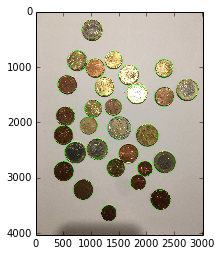

In [4]:
srcImages = glob.glob("img/src/*/*.jpg")
for srcImage in srcImages:
    (imgPath, imgName) = os.path.split(srcImage)
    (imgBase, srcExt) = os.path.splitext(imgName)
    (typePath, typeName) = os.path.split(imgPath)
    img = loadImage(srcImage)
    coins = findCoins(img, showCoins = True)
    print('found {} coins in {}'.format(coins.shape[0], srcImage))
    if coins is None: 
        break
            
    maxRadius = np.amax(coins,0)[2]
    for ix,(x,y,r) in enumerate(coins):
        img_coin = img[y-maxRadius:y+maxRadius, x-maxRadius:x+maxRadius]
        img_coin = cv2.resize(img_coin, (150,150))
        outDir = os.path.join("img/data", typeName)
        if not os.path.exists(outDir):
            os.makedirs(outDir)
        outName = "%s_%s.png" % (imgBase, ix)
        cv2.imwrite(os.path.join(outDir, outName), cv2.cvtColor(img_coin, cv2.COLOR_RGB2BGR))